In [1]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import pandas as pd

from https://www.analyticsvidhya.com/blog/2018/03/essentials-of-deep-learning-visualizing-convolutional-neural-networks/

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### loading datasets

In [3]:
df = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df.iloc[:, 1:]
y = df.iloc[:,0]
X.shape, y.shape

((60000, 784), (60000,))

### creating a dataset class

In [5]:
# my_transforms = transforms.ToTensor()
my_transforms = ""
class fashion_dataset(Dataset):
    def __init__(self,data_path="../input/fashionmnist/fashion-mnist_train.csv", transforms=my_transforms, subset_length=2000):
        if subset_length:
            self.input_df = pd.read_csv(data_path)[:subset_length]
        else :
            self.input_df = pd.read_csv(data_path)
        self.len = len(self.input_df)
        if transforms:
            self.transform = transforms
        else:
            self.transform = ""
        

        self.x  = torch.from_numpy(self.input_df.iloc[:,1:].values)
        self.x = self.x.reshape(self.x.size(0), 1, 28,28).float()
        
        self.y = torch.from_numpy(self.input_df.iloc[:,0].values).long()
        
    def __len__(self):
        return self.len
    
    def __getitem__(self, index):
        x_item = self.x[index]
        y_item = self.y[index]
        
        if (self.transform):
            x_item = self.transform(x_item)
               
        return x_item, y_item 

In [6]:
train_dataset = fashion_dataset()

torch.Size([1, 28, 28]) tensor(2)
tensor(2)


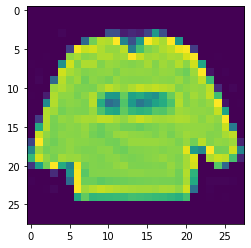

In [7]:
X, y = train_dataset[0]

print(X.shape, y)

import matplotlib.pyplot as plt

print(y)

img = X.permute(1,2,0)
plt.imshow(img)

In [8]:
train_dataloader = DataLoader(train_dataset, batch_size=128,shuffle=True)

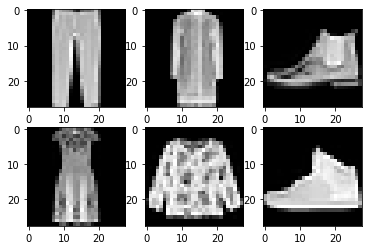

In [9]:
examples = iter(train_dataloader)
example_data, example_targets = examples.next()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show() 

In [10]:
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [11]:
 # Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
         # no activation and no softmax at the end
        return out 

In [12]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [13]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

In [14]:
len(train_dataloader)

16

In [15]:
n_total_steps = len(train_dataloader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_dataloader):  
         # origin shape: [100, 1, 28, 28]
         # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
         # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
         # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 
        #print(i)
        if (i+1) % 10 == 0:
             print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step[10/16], Loss: 13.6471
Epoch [2/2], Step[10/16], Loss: 3.1071


# need to visualise
also how is the model trained here